In [85]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [57]:
df=pd.read_csv('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Clustering\\crime_data.csv')
df.head(2)

,Area,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


In [49]:
# Hierarchical Clustering

In [18]:
#Customer Normalization
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [61]:
# Inbult Normalization Function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfNN=scaler.fit_transform(df.iloc[:,1:])


In [20]:
dfN=norm_fun(df.iloc[:,1:])
dfN.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


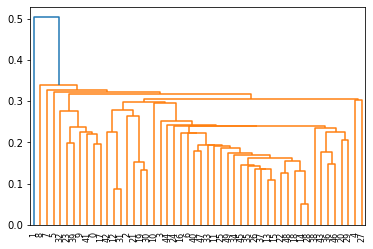

In [72]:
dendrogram = sch.dendrogram(sch.linkage(dfN,method='single'))

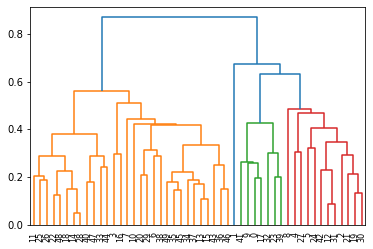

In [43]:
dendrogram = sch.dendrogram(sch.linkage(dfN,method='average'))

In [44]:
hc=AgglomerativeClustering(n_clusters =4,affinity='euclidean',linkage='average')

In [45]:
y_hc=hc.fit_predict(dfN)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [46]:
dfN.head(2)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240


In [55]:
df1=df
df1["Cluster"]=Clusters

In [56]:
df1.head()

,Area,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [62]:
# KMeans Clustering


In [66]:
inertia = []
for i in range (1,10):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(dfN)
    inertia.append(kmeans.inertia_)

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory le

Text(0, 0.5, 'Inertia')

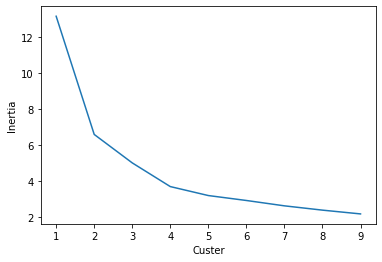

In [69]:
plt.plot(range(1,10),inertia)
plt.xlabel('Custer')
plt.ylabel('Inertia')


In [74]:
clusterN=KMeans(4,random_state=1)
clusterN.fit(dfN)

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [76]:
clusterN.labels_

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 2, 1, 2,
       3, 0, 2, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 3, 1])

In [77]:
df2=df
df2.head(2)

,Area,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


In [79]:
df2["Cluster_Kmean"]=clusterN.labels_
df2.head(2)

,Area,Murder,Assault,UrbanPop,Rape,Cluster_Kmean
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2


In [86]:
df2.groupby('Cluster_Kmean').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Cluster_Kmean,,,,
0,13.937500,243.625000,53.750000,21.412500
1,5.656250,138.875000,73.875000,18.781250
2,10.815385,257.384615,76.000000,33.192308
3,3.600000,78.538462,52.076923,12.176923


In [87]:
# DBSCAN 

In [90]:
dfN.head(2)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240


In [93]:
array=dfN.values
array

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [171]:
dbscan = DBSCAN(eps=0.4,min_samples=2)
dbscan.fit(array)

DBSCAN(eps=0.4, min_samples=2)

In [172]:
#Noisey Data
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [175]:
cl=pd.DataFrame(dbscan.labels_,columns=["clustersDBS"])
cl.head(2)

,clustersDBS
0,0
1,-1


In [179]:
df2=df
df2['clustersDBS']=cl
df2.head(2)

,Area,Murder,Assault,UrbanPop,Rape,Cluster_Kmean,clustersDBS
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,2,-1


In [ ]:
# Inference is that there us 1 Noice Point in the Data set which can be removed and then we can perform the K Means Clustering 
# 4 is the Optimal K value for K Means Clustering